# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'lib')))
from renormalization import required_initial_max_distance, construct_transfer_matrix
from utils import build_J

# Thermal exponent yT

In [34]:
a = .98
N = 1000

Jc = find_Jc(
    a=a,
    Jlow=1e-2, Jhigh=1e2,
    max_steps=6, max_dist_final=5,
    tol=1e-5, growth_threshold=1e4, decay_threshold=1e-4
)
J0 = build_J(Jc, a, D=N)
J_star, info = newton_rg_lstsq(J0, verbose=False)

T, J_head = recursion_matrix_at_fixed_point(J_star, N)
y_T, lambda_T, eigs = thermal_exponent_from_T(T, b=3.0)

print("Largest relevant eigenvalue λ_T:", lambda_T)
print("Thermal scaling exponent y_T:", y_T)
print("Correlation length exponent ν ≈ 1/y_T:", 1.0/y_T)

Largest relevant eigenvalue λ_T: (1.0442915858807107+0j)
Thermal scaling exponent y_T: 0.0394486278116333
Correlation length exponent ν ≈ 1/y_T: 25.34942418719828


In [30]:
eigvals = np.linalg.eigvals(T)
sorted(eigvals, key=lambda z: abs(z), reverse=True)

[np.complex128(0.9192612128050655+0j),
 np.complex128(0.2816243583784812+0.5832769306273999j),
 np.complex128(0.2816243583784812-0.5832769306273999j),
 np.complex128(-0.28685238540515234+0.4504715919158681j),
 np.complex128(-0.28685238540515234-0.4504715919158681j),
 np.complex128(-0.49241816019438156+0j),
 np.complex128(-0.07132686766022356+0j),
 np.complex128(-0.036776474800989715+0.05539590197778245j),
 np.complex128(-0.036776474800989715-0.05539590197778245j),
 np.complex128(0.030915640573921106+0.05300511017368809j),
 np.complex128(0.030915640573921106-0.05300511017368809j),
 np.complex128(0.05346509533244396+0j),
 np.complex128(-0.005125709040049381+0j),
 np.complex128(-5.0542586480917926e-05+4.7849369529639414e-05j),
 np.complex128(-5.0542586480917926e-05-4.7849369529639414e-05j),
 np.complex128(4.2659492944909175e-05+4.824793552894552e-05j),
 np.complex128(4.2659492944909175e-05-4.824793552894552e-05j),
 np.complex128(3.578586133550879e-05+1.973423753278621e-05j),
 np.complex12

## Stability of yT with N

In [ ]:
# ----- parameters -----
b = 3.0
N_min = 20
N_max = len(J_star) - 1    # maximum allowed head size

Ns = []
lambda_Ts = []
yTs = []

# ----- main sweep -----
for N in range(N_min, N_max + 1, 20):
    T, J_head = recursion_matrix_at_fixed_point(J_star, N)
    y_T, lambda_T, eigs = thermal_exponent_from_T(T, b)

    
    Ns.append(N)
    lambda_Ts.append(lambda_T.real)
    yTs.append(y_T.real)

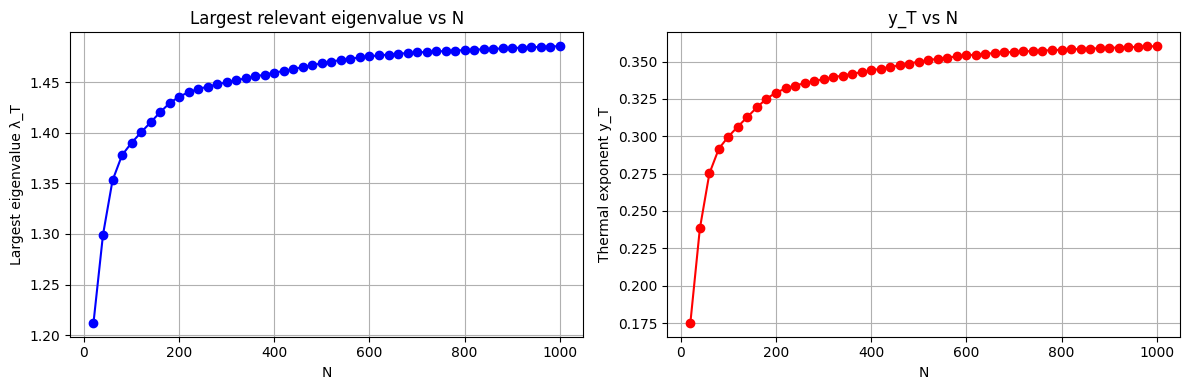

In [27]:
# ----- plots -----
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(Ns, lambda_Ts, 'b-o')
ax[0].set_xlabel("N")
ax[0].set_ylabel("Largest eigenvalue λ_T")
ax[0].set_title("Largest relevant eigenvalue vs N")
ax[0].grid()

ax[1].plot(Ns, yTs, 'r-o')
ax[1].set_xlabel("N")
ax[1].set_ylabel("Thermal exponent y_T")
ax[1].set_title("y_T vs N")
ax[1].grid()

plt.tight_layout()
plt.savefig("../figures/yT_stability.png")
plt.show()

# Magnetic exponent yH

In [35]:
a = 1
tolerance = 1e-5

Jc = find_Jc(
    a=a,
    Jlow=1e-2, Jhigh=1e2,
    max_steps=6, max_dist_final=5,
    tol=tolerance,
    growth_threshold=1e4, decay_threshold=1e-4
)
print("Critical J =", Jc)

J0 = build_initial_guess(Jc, a=a, D=200)
J_star, info = newton_rg_lstsq(J0, verbose=True)
print("Fixed point J*:\n", J_star)
err = check_fixed_point(J_star, tol=tolerance)
print()
yH, alphaH = magnetic_exponent_yH(J_star, eps=1e-8, b=3.0)
print("dH'/dH at fixed point =", alphaH)
print("y_H =", yH)

Critical J = 0.12799049526453016
[lstsq] iter 0: D=200, D1=66, ||J'-J||=1.960e-02
[lstsq] iter 1: D=200, D1=66, ||J'-J||=1.367e-02
[lstsq] iter 2: D=200, D1=66, ||J'-J||=8.602e-03
[lstsq] iter 3: D=200, D1=66, ||J'-J||=5.268e-03
[lstsq] iter 4: D=200, D1=66, ||J'-J||=1.874e-03
[lstsq] iter 5: D=200, D1=66, ||J'-J||=3.904e-04
[lstsq] iter 6: D=200, D1=66, ||J'-J||=1.304e-04
[lstsq] iter 7: D=200, D1=66, ||J'-J||=5.472e-05
[lstsq] iter 8: D=200, D1=66, ||J'-J||=2.147e-05
[lstsq] iter 9: D=200, D1=66, ||J'-J||=7.297e-06
Fixed point J*:
 [0.         0.12242913 0.05533485 0.03232251 0.02482908 0.022188
 0.02103317 0.01699398 0.01350825 0.01072418 0.00987416 0.00938945
 0.0089723  0.00849432 0.00820056 0.00792457 0.00782142 0.00787141
 0.00788337 0.0072592  0.00662165 0.00606923 0.00566228 0.00525101
 0.00488706 0.00450457 0.00409968 0.0037425  0.00367203 0.00363021
 0.00357539 0.00350288 0.00344999 0.00338925 0.00333532 0.00329874
 0.00325412 0.00318257 0.00312    0.00305597 0.00302074 0.00

# Critical exponents

In [ ]:
result = compute_exponents_over_a(
    a_min=1, a_max=2.0,
    num_points=10,
    D_init=2000, N_matrix=1000,
    d_dim=1.0, b=3.0
)

a = result["a"]
exps = [
    ("yT",     result["yT"]),
    ("yH",     result["yH"]),
    ("β",      result["beta"]),
    ("δ",      result["delta"]),
    ("η",      result["eta"]),
    ("ν",      result["nu"]),
    ("α",      result["alpha"]),
    ("γ",      result["gamma"]),
]

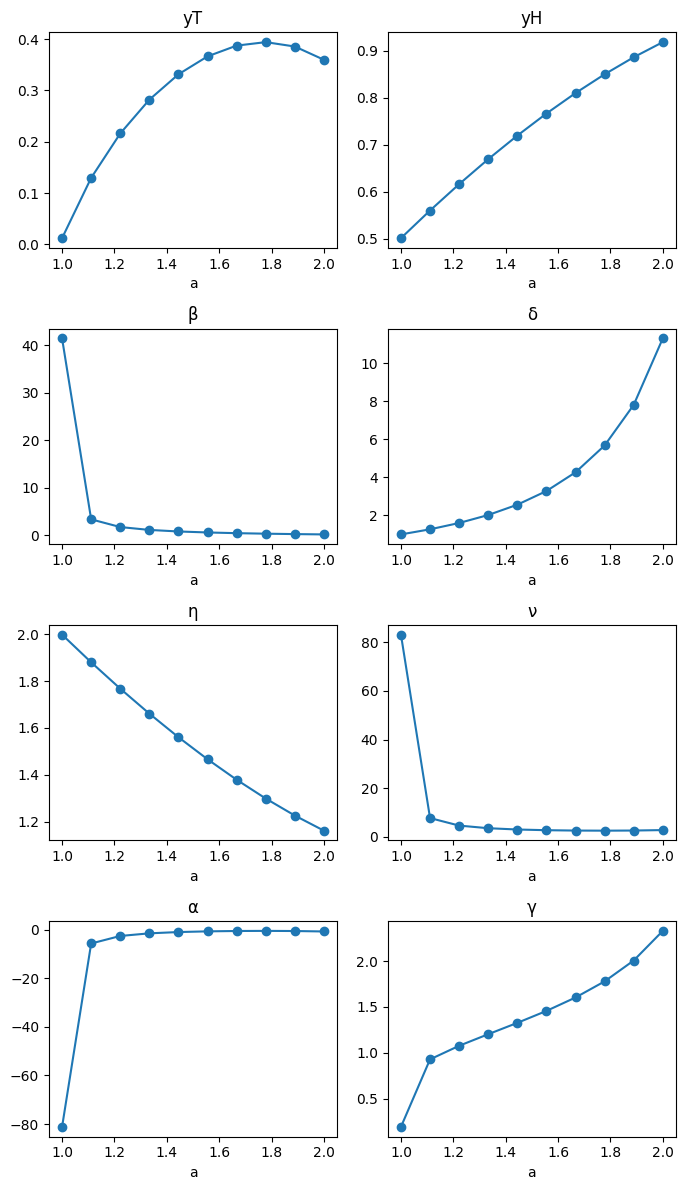

In [8]:
fig, axes = plt.subplots(4, 2, figsize=(7, 12))
axes = axes.flatten()

for i, (name, vals) in enumerate(exps):
    ax = axes[i]
    ax.plot(a, vals, marker="o")
    ax.set_title(name)
    ax.set_xlabel("a")
    ax.grid(False)
plt.tight_layout()
#plt.savefig("../figures/exponents_new.png")
plt.show()